In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Collection and Processing

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
df = pd.read_csv("D:New folder/titanictrain.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop(columns='Cabin', axis=1)

In [9]:
df.shape

(891, 11)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
print(df['Embarked'].mode())

0    S
dtype: object


In [12]:
print(df['Embarked'].mode()[0])

S


In [13]:
df["Embarked"].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualisation

In [17]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

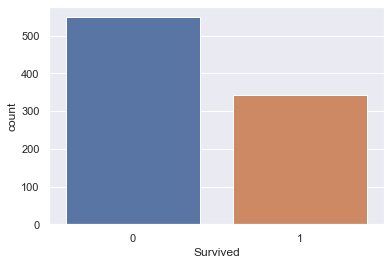

In [18]:
sns.countplot('Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

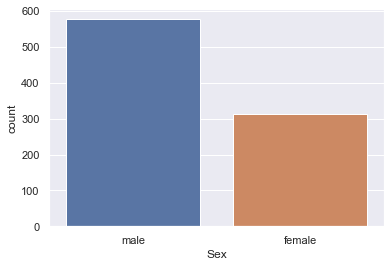

In [19]:
sns.countplot('Sex',data=df)

In [20]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

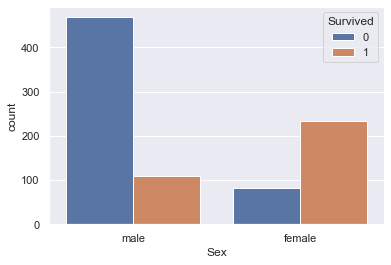

In [21]:
sns.countplot('Sex',hue='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

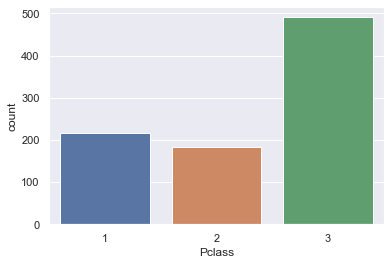

In [22]:
sns.countplot('Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

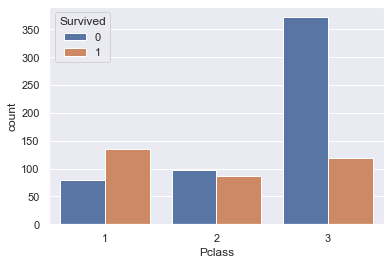

In [23]:
sns.countplot('Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

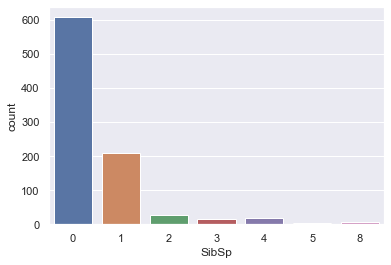

In [60]:
sns.countplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

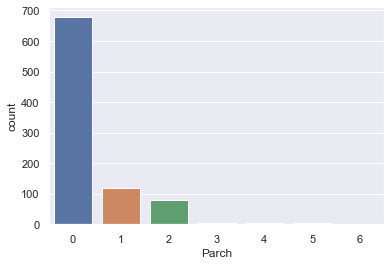

In [61]:
sns.countplot(df['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

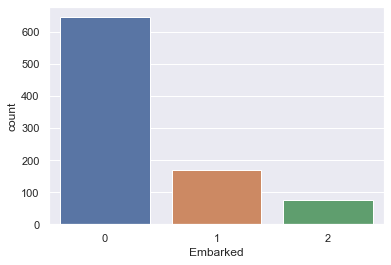

In [62]:
sns.countplot(df['Embarked'])

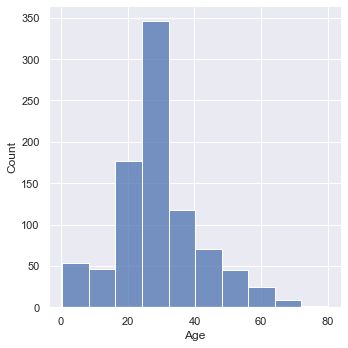

In [72]:
sns.displot(df['Age'],bins=10)

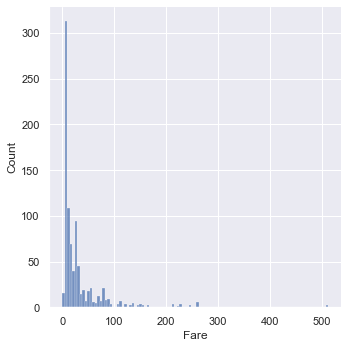

In [78]:
sns.displot(df['Fare'])

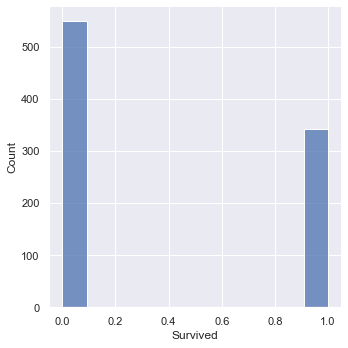

In [63]:
sns.displot(df['Survived'])

# Encoding the Categorical Columns

In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [28]:
x = df.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y = df['Survived']

In [29]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
print(x.shape,x_train,x_test)

(891, 7)      Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
30        1    0  40.000000      0      0   27.7208         1
10        3    1   4.000000      1      1   16.7000         0
873       3    0  47.000000      0      0    9.0000         0
182       3    0   9.000000      4      2   31.3875         0
876       3    0  20.000000      0      0    9.8458         0
..      ...  ...        ...    ...    ...       ...       ...
534       3    1  30.000000      0      0    8.6625         0
584       3    0  29.699118      0      0    8.7125         1
493       1    0  71.000000      0      0   49.5042         1
527       1    0  29.699118      0      0  221.7792         0
168       1    0  29.699118      0      0   25.9250         0

[712 rows x 7 columns]      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
707       1    0  42.000000      0      0  26.2875         0
37        3    0  21.000000      0      0   8.0500         0
615       2    1  24.000000      1      

# Model Training with Logistic Regression

In [42]:
model = LogisticRegression()

In [43]:
# Training the Logistic Regression model with training data

In [44]:
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation using Accuracy Score

In [45]:
#Accuracy on training data

In [47]:
x_train_prediction = model.predict(x_train)

In [48]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [49]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [50]:
print(training_data_accuracy)

0.8075842696629213


In [51]:
# Accuracy score on test data

In [52]:
x_test_prediction = model.predict(x_test)

In [53]:
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [54]:
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [55]:
print(testing_data_accuracy)

0.7821229050279329


In [83]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)
print(mean_squared_error(y_test , dt_pred))
print(accuracy_score(y_test , dt_pred))
print(confusion_matrix(y_test , dt_pred))

0.21787709497206703
0.7821229050279329
[[82 18]
 [21 58]]


In [ ]:
Stocks1= pd.DataFrame({"Actual":y_test.flatten(),"Prediction":dt_pred.flatten()})
Stocks1.head()

In [88]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)
print(mean_squared_error(y_test , rf_pred))
print(accuracy_score(y_test , rf_pred))
print(confusion_matrix(y_test , rf_pred))

0.18994413407821228
0.8100558659217877
[[86 14]
 [20 59]]


In [91]:
svm = DecisionTreeClassifier()
svm.fit(x_train,y_train)

svm_pred = svm.predict(x_test)
print(mean_squared_error(y_test , svm_pred))
print(accuracy_score(y_test , svm_pred))
print(confusion_matrix(y_test , svm_pred))

0.22346368715083798
0.776536312849162
[[82 18]
 [22 57]]


In [93]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
prediction=knn_classifier.predict(x_test)
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)
accuracy_score = accuracy_score(y_test,prediction)
print(accuracy_score)
print(mean_squared_error(y_test ,prediction))


[[83 17]
 [40 39]]
0.6815642458100558
0.31843575418994413


In [97]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=0)
model =  LinearRegression()

model.fit(x_train,y_train)

print(model.coef_)

[-1.66168721e-01  5.05586905e-01 -6.39122810e-03 -4.68456483e-02
 -1.10554509e-02  2.95381569e-04  4.06591079e-02]


In [99]:
Lr_pred = model.predict(x_test)
print(Lr_pred)

[ 1.44824330e-01  1.02124637e-01  1.36452905e-01  9.74911858e-01
  6.33001167e-01  4.41241087e-01  9.17313560e-01  9.56092301e-01
  4.82981658e-01  6.48275892e-01  7.90107488e-02  7.09654805e-01
  1.83501929e-01  9.02368236e-01  1.03946575e+00  7.08138040e-01
  1.45434990e-01  2.87397902e-01  6.83931800e-02  3.19143359e-01
  3.44231845e-01  1.03179075e+00  1.83498237e-01  4.41388777e-01
  6.57594045e-01  8.94470395e-01  8.75213164e-02  6.56977436e-01
  7.98307736e-01  6.28106090e-01  1.22015665e-01  6.45004070e-01
  1.13560080e-01  4.42717995e-01  5.95982781e-02  4.67194731e-01
  1.67907447e-02  2.80024183e-01  2.99936321e-01  1.14886088e-01
  2.44724327e-01  1.72720879e-01  1.04177539e-01  1.35160603e-02
  8.81751034e-01  1.02226780e-01  1.02226780e-01  1.01494823e+00
  2.10459127e-01  2.55327966e-01  4.41093396e-01  5.23366069e-01
  8.84791733e-01  1.70607282e-01  4.81663889e-01  2.30506837e-01
  2.33632023e-01  5.24736302e-01  7.13893598e-02  9.43890472e-02
  1.91895804e-01  5.71952

In [100]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,Lr_pred))

Mean Squared Error: 0.13608761568096575


# Thus we can conclude that out of all other machine learning algorithm, RandomForest() classifier gives the best accuracy score.